# Title:  Intraday Stock Prediction

## Exploratory Data Analysis for MFST.csv


##### Import the required libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("setup completed")

setup completed


##### Read the comma separated file(csv) as follows:

In [30]:
data = pd.read_csv("MSFT.csv", parse_dates=['Date'])
print("Data Is Imported Successfully")

Data Is Imported Successfully


In [31]:
data     # display the date

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...,...
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200


In [56]:
data.isnull()    #check for any null values

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8852,False,False,False,False,False,False,False
8853,False,False,False,False,False,False,False
8854,False,False,False,False,False,False,False
8855,False,False,False,False,False,False,False


In [57]:
data.isnull().sum()          # get the total number of null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
data.shape      # To get the actual number of rows and columns present in the dataset:

(8857, 7)

In [23]:
data.head(10)     # Display the first 10 rows of the dataset:

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [24]:
data.tail(10)       # Display the last 10 rows of the dataset:

,Date,Open,High,Low,Close,Adj Close,Volume
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540009,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509995,252.509995,40589000
8855,2021-04-30,249.740005,253.080002,249.600006,252.179993,252.179993,30929200
8856,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900


##### Describe the dataset to get the total count, mean, standard deviation, minimum and maximum value and percentage values in the respective column

In [25]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8857 non-null   datetime64[ns]
 1   Open       8857 non-null   float64       
 2   High       8857 non-null   float64       
 3   Low        8857 non-null   float64       
 4   Close      8857 non-null   float64       
 5   Adj Close  8857 non-null   float64       
 6   Volume     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


In [11]:
data.columns      # total columns with their column name

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [63]:
# Splitting Date into Day,Month and Year
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year



data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800,13,3,1986
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000,14,3,1986
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200,17,3,1986
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400,18,3,1986
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400,19,3,1986
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060648,58435200,20,3,1986
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058994,59990400,21,3,1986
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057340,65289600,24,3,1986
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058443,32083200,25,3,1986
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.060097,22752000,26,3,1986


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8857 non-null   datetime64[ns]
 1   Open       8857 non-null   float64       
 2   High       8857 non-null   float64       
 3   Low        8857 non-null   float64       
 4   Close      8857 non-null   float64       
 5   Adj Close  8857 non-null   float64       
 6   Volume     8857 non-null   int64         
 7   Day        8857 non-null   int64         
 8   Month      8857 non-null   int64         
 9   Year       8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 692.1 KB


## Data Visualization

### Analyzing the relationships between variables

<AxesSubplot:xlabel='Date', ylabel='Open'>

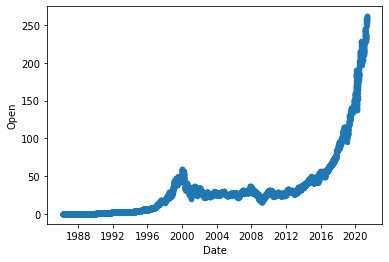

In [65]:
data.plot(kind='scatter', x='Date', y='Open')

<AxesSubplot:xlabel='Date', ylabel='Close'>

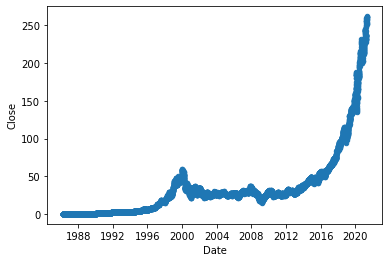

In [66]:
data.plot(kind='scatter', x='Date', y='Close')

<AxesSubplot:xlabel='Date', ylabel='High'>

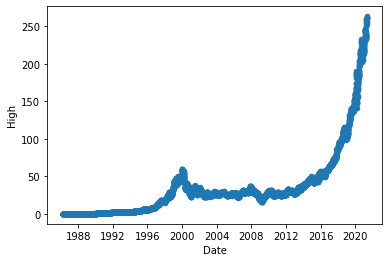

In [67]:
data.plot(kind='scatter', x='Date', y='High')

<AxesSubplot:xlabel='Date', ylabel='Low'>

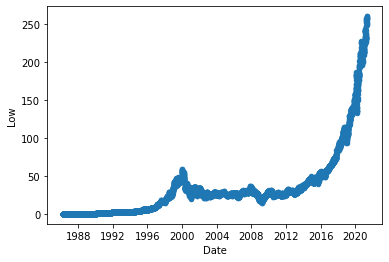

In [68]:
data.plot(kind='scatter', x='Date', y='Low')

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

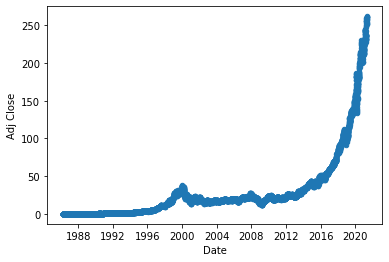

In [69]:
data.plot(kind='scatter', x='Date', y='Adj Close')

<AxesSubplot:xlabel='Date', ylabel='Volume'>

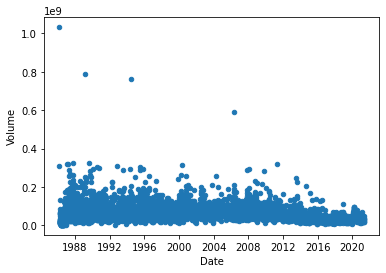

In [70]:
data.plot(kind='scatter', x='Date', y='Volume')

<AxesSubplot:xlabel='Date', ylabel='Open'>

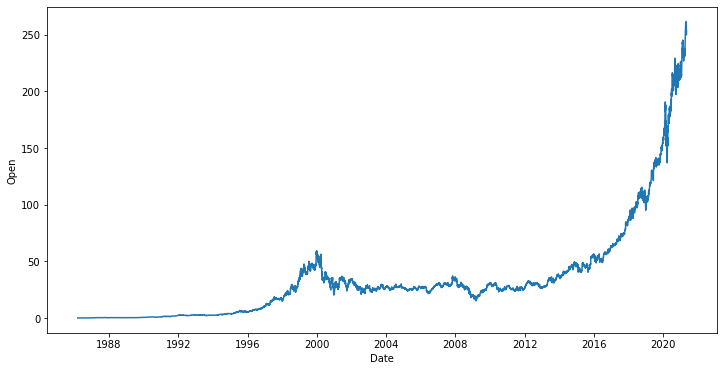

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data['Date'],data['Open'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

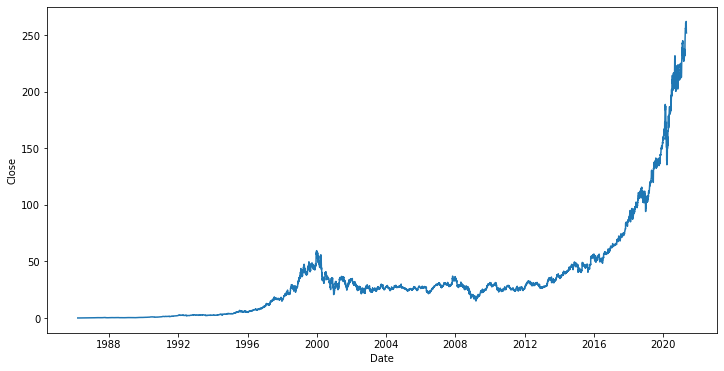

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(data['Date'],data['Close'])

<AxesSubplot:xlabel='Date', ylabel='High'>

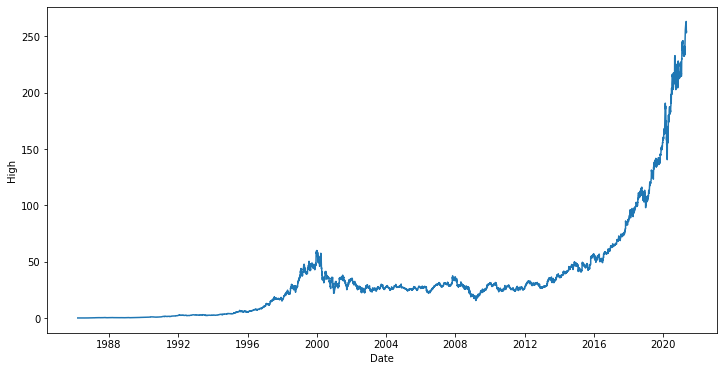

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data['Date'],data['High'])

<AxesSubplot:xlabel='Date', ylabel='Low'>

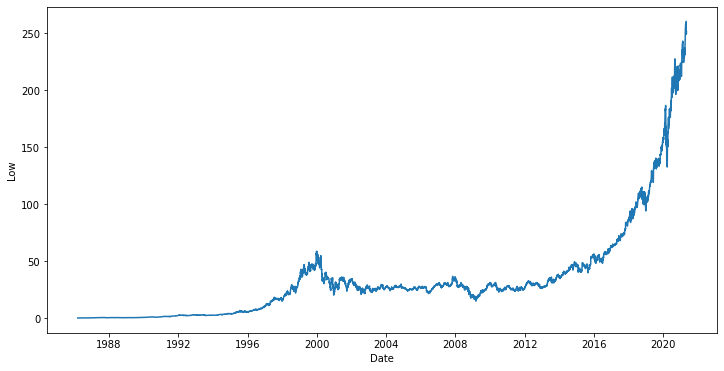

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(data['Date'],data['Low'])

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

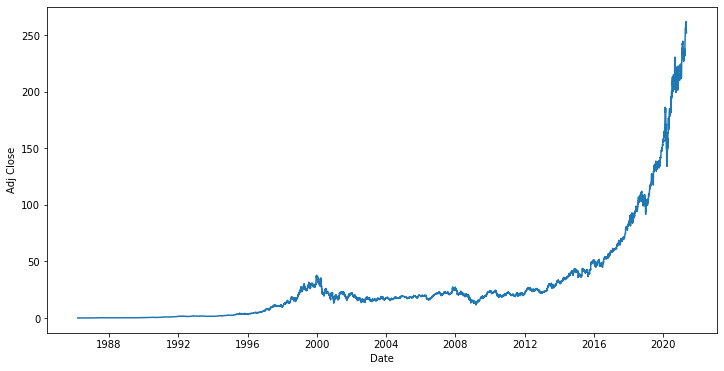

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(data['Date'],data['Adj Close'])

Maximum value is: 261.66000366210943
Minimum value is: 0.08854199945926666


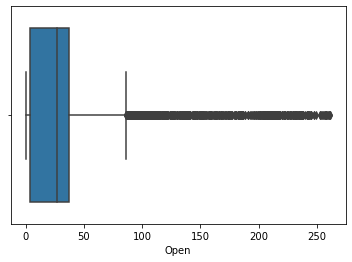

In [54]:
sns.boxplot(data['Open'])
print('Maximum value is:',data['Open'].max())
print('Minimum value is:',data['Open'].min())

Maximum value is: 261.97000122070307
Minimum value is: 0.09027799963951112


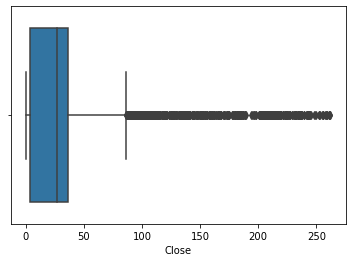

In [55]:
sns.boxplot(data['Close'])
print('Maximum value is:',data['Close'].max())
print('Minimum value is:',data['Close'].min())

#### lets again describe the datset and lets know the maximum and minimum values so that we would be able to detect the outliers as:

In [52]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8857.000000,8857.000000,8857.000000,8857.000000,8857.000000,8.857000e+03
mean,34.831233,35.209355,34.449657,34.840895,29.886536,5.953411e+07
std,44.060163,44.513443,43.597704,44.080986,44.195101,3.858121e+07
min,0.088542,0.092014,0.088542,0.090278,0.057340,2.304000e+06
25%,3.843750,3.875000,3.812500,3.851563,2.446323,3.559720e+07
50%,26.590000,26.879999,26.290001,26.590000,18.686628,5.269680e+07
75%,36.730000,37.000000,36.110001,36.660000,27.218300,7.339520e+07
max,261.660004,263.190002,260.170013,261.970001,261.970001,1.031789e+09


##### thus we have seen that the values in the 'open', 'high', 'low', 'colse' and 'adj close' varies from 0.0__ to 260+